In [1]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [3]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
x=Flatten()(vgg.output)

In [8]:
pred = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input,outputs = pred)

In [9]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [13]:
training_set

In [14]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [24]:
r.history

{'loss': [0.9077731370925903,
  0.6029370427131653,
  0.5411573052406311,
  0.45502549409866333,
  0.4054710566997528,
  0.3695434033870697,
  0.288973867893219,
  0.24841102957725525,
  0.22495821118354797,
  0.1922929286956787,
  0.1568441092967987,
  0.13542303442955017,
  0.13131555914878845,
  0.12460771203041077,
  0.11601657420396805,
  0.10488168895244598,
  0.0803893432021141,
  0.06668457388877869,
  0.0866275280714035,
  0.09480597078800201,
  0.07057034224271774,
  0.07793193310499191,
  0.09679728001356125,
  0.14366227388381958,
  0.13053245842456818,
  0.0706864520907402,
  0.061013363301754,
  0.03388082608580589,
  0.05180143564939499,
  0.09664174169301987,
  0.07971139252185822,
  0.05909556895494461,
  0.0628092959523201,
  0.09689462184906006,
  0.20728357136249542,
  0.15029387176036835,
  0.11135509610176086,
  0.05175825580954552,
  0.01869843155145645,
  0.05093725398182869,
  0.01627376116812229,
  0.01555989682674408,
  0.023004190996289253,
  0.0115069448947

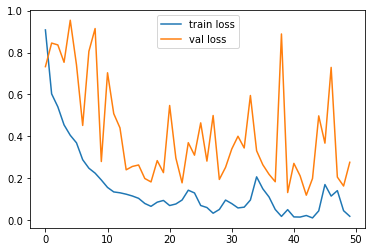

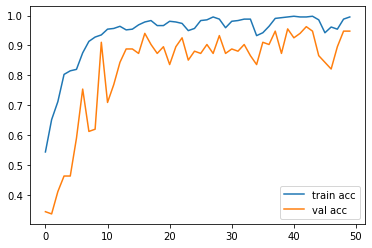

<Figure size 432x288 with 0 Axes>

In [20]:
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
model.save('model_vgg19.h5')

In [28]:
y_pred = model.predict(test_set)

In [30]:
y_pred

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.8468667e-16],
       [1.3442481e-03, 9.9865568e-01],
       [1.0000000e+00, 1.4463269e-28],
       [1.0000000e+00, 1.0266169e-21],
       [9.8253461e-03, 9.9017465e-01],
       [1.1328245e-02, 9.8867178e-01],
       [1.0000000e+00, 5.5823390e-31],
       [2.5413083e-03, 9.9745876e-01],
       [1.0000000e+00, 2.6108872e-15],
       [1.0000000e+00, 3.0212379e-16],
       [1.1851715e-03, 9.9881482e-01],
       [9.5885628e-01, 4.1143667e-02],
       [1.3796790e-01, 8.6203206e-01],
       [1.0000000e+00, 4.4291986e-18],
       [1.0000000e+00, 4.1742343e-25],
       [1.0000000e+00, 2.7506206e-13],
       [1.0000000e+00, 1.2023991e-22],
       [1.0000000e+00, 5.9030548e-24],
       [1.0000000e+00, 0.0000000e+00],
       [6.1559170e-01, 3.8440824e-01],
       [9.7626489e-01, 2.3735084e-02],
       [1.0000000e+00, 2.4470439e-18],
       [1.0000000e+00, 1.9196875e-19],
       [1.0000000e+00, 5.8147664e-19],
       [3.4872103e-03, 9.

In [31]:
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [33]:
model=load_model('model_vgg19.h5')

In [34]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [35]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

In [43]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
